# Metody uczenia maszynowego 2017

## Syllabus

1. Przypomnienie podstawowych potrzebnych elementów rachunku prawdopodobieństwa
2. Najważniejsze problemy i metody uczenia maszynowego
  * uczenie nadzorowane i nienadzorowane
  * regresja i klasyfikacja
  * uczenie seminadzorowane
  * uczenie ze wzmocnieniem
3. Metody regresji
4. Klasyfikacja

## Zasady zaliczania
1. wynik z zajęć laboratoryjnych będzie się liczył do oceny końcowej

<h3 id=tocheading>Spis treści</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

# Elementy rachunku prawdopodobieństwa - bardzo krótkie przypomnienie
> _Rachunek prawdopodobieństwa to tylko zdrowy rozsądek ograniczony do obliczeń_ (Pierre-Simon Laplace, 1812)

> _Są trzy rodzaje kłamstwa: kłamstwa, cholerne kłamstwa, oraz statystyka_ (spopularyzowane przez Marka Twaina)


## Aksjomaty
1. $P(A)\ge0$
2. $P(\Omega) = 1$
3. Jeśli $A_i$ są _rozłączne_, to $P(\bigcup_i A_i)=\sum_i P(A_i)$

Prawdopodobieństwo, że zajdą $A$ i $B$
$$p(A\cap B)=p(A|B)p(B)=p(B)p(B|A)$$


### Prawdopodobieństwo całkowite
jeśli $B_i$ są _rozłączne_ oraz $\bigcup_iB_i=\Omega$ to 
$$p(A)=\sum_ip(A\cap B)=\sum_ip(A|B_i)p(B_i)$$

Jeśli $C$ _nie jest rozłączne z $A$ czy każdym z $B_i$, wtedy 
$$p(A|C)=\sum_i p(A|C\cup B_i)p(B_i|C)$$

## Podejście częstotliwościowe a podejście Bayesowskie
1. __częstotliwościowe__ zajmuje się czętotliwością występowania zdarzenia $A$ w szeregu identycznych doświadczeń,
2. __bayesowskie__ zajmuje się $p(A|B)$ - szansą zdarzenia $A$ uwarunkowanego zdarzeniem $B$
  * prawdopodobieństwo nadejścia ery lodowcowej nie nadaje się do podejścia częstotliwościowego...

## Prawdopodobieństwo brzegowe
podzbioru zmiennych losowych daje rozkład prawdopodobieństwa tego podzbioru
$$p(x)=\sum_yp(x,y)=\sum_y p(x|y)p(y)$$

In [4]:
import numpy as np

/Users/dominikolczyk/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


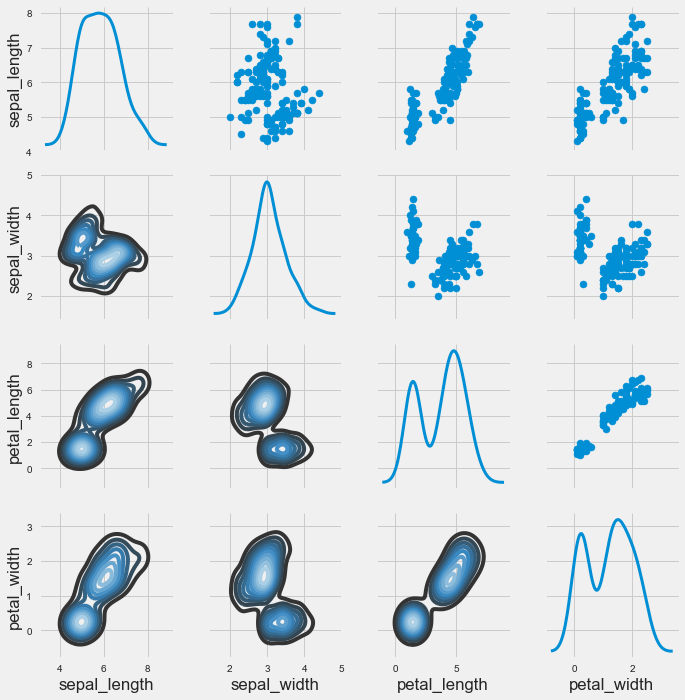

In [3]:
df = sns.load_dataset("iris")

g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

## Prawdopodobieństwo warunkowe i reguła Bayesa
$$p(x,y)=p(x|y)p(y)=p(y|x)p(x)$$
$$p(x)=\sum_yp(x,y)=\sum_y p(x|y)p(y)$$
z czego dla zmiennych dyskretnych
$$p(y_j|x)=\frac{p(x|y_j)p(y_j)}{p(x)}=\frac{p(x|y)p(y_j)}{\sum_j p(x|y_j)p(y_j)}$$

* $p(y_j)$ to prawdopodobieństwo _a priori_ przed obserwacją zdarzenia $x$
* $p(y_j|x)$ to _a posteriori_ po zajściu $x$
  

### Monty Hall
1. mamy 1000 pudełek, 999 pustych, w jednym jest nagroda
  * prawdopodobieństwa, że w dowolnym pudełku jest nagroda wynosi $1/1000$,
2. gracz wybiera jedno pudełko,
3. prowadzący, który _wie gdzie jest nagroda_, otwiera 998 _pustych_ pudełek
  * __nie__ wybiera ich _losowo_
4. prowadzący daje szansę, by gracz zmienił teraz wybór
  * czy powinien to uczynić i czy zmaina cokolwiek zmienia?
  
  
1. __NIE__, bo szansa, że nagroda jest w każdym z _nieotwartych_ pudełek jest identyczna i wynosi $1/2$?
2. __TAK__, bo
  1. szansa, że wygrana jest w wybranym pudełku wynosi 1/1000,
  2. szansa, że jest w dowolnym z pozostałych to 999/1000,
  3. prowadzący usunął z tych 999 błędne wybory,
  4. zmiana zwiększa szansę grającego do 999/1000?

## Problem Monty-ego Halla w wersji Marilyn vos Savant z 1990

> Jest gra i grający ma szansę wyboru jednych z _trojga_ drzwi: za jednymi jest samochód, za pozostałymi dwoma kozy. Grający wybiera drzwi. W tej chwili prowadzący, który _wie gdzie jest nagroda_, otwiera jedne z pozostałych dwojga za którymi jest koza. Wtedy prowadzący daje szansę _zmiany_ wyboru.

>Czy grający powinien zmienić wybór?

Odpowiedź, że tak spotkała się z __tysiącami__ listów oburzonych ludzi, w tym bardzo wielu matematyków! [Marilyn vos Savant](http://www.marilynvossavant.com/articles/gameshow.html)
> You blew it, and you blew it big! Since you seem to have difficulty grasping the basic principle at work here, I’ll explain. After the host reveals a goat, you now have a one-in-two chance of being correct. Whether you change your selection or not, the odds are the same. There is enough mathematical illiteracy in this country, and we don’t need the world’s highest IQ propagating more. Shame!
Scott Smith, Ph.D.
University of Florida

>I am sure you will receive many letters on this topic from high school and college students. Perhaps you should keep a few addresses for help with future columns.
W. Robert Smith, Ph.D.
Georgia State University

>I still think you’re wrong. There is such a thing as female logic.
Don Edwards
Sunriver, Oregon

* otwarcie przez prowadzącego drzwi wprowadza __nową__ wiedzę
  * nie modyfikuje ona szansy wygranej za wybranymi drzwiami,
  * zmienia jednak szansę w drugich drzwiach dotąd zamkniętych

## Testy medyczne
1. wynik testu medycznego może być _pozytywny_ (T=1) lub _negatywny_ (T=0)
2. pacjent może być rzeczywiście chory (D=1) lub zdrowy (D=0)

Testy __nie są jednak__ bezwględnie poprawne
1. prawdopodobieństwo _pozytywnego_ wyniku testu dla _zdrowego_ pacjenta (false positive) wynosi $$p(T=1|D=0)=\epsilon_{fP}$$
  * negatywny wynik testu dla zdrowego to $$p(T=0|D=0)=1-\epsilon_{fP}$$
2. prawdopodobieństwo testu negatywnego dla chorego (false negative) to $$p(T=0|D=1)=\epsilon_{fN}$$
  * pozytywny dla chorego $$p(T=1|D=1)=1-\epsilon_{fN}$$
3. prawdopodobieństwo _a priori_ chory to $p(D=1)=\epsilon_D$
  
Niech wynik testu będzie pozytywny. _Jakie jest prawdopodobieństwo, że pacjent, jest rzeczywiście chory?
$$\begin{align}
p(D=1|T=1)&=\frac{P(T=1|D=1)P(D=1)}{\sum_{d_i} p(T=1|D=d_i)p(D=d_i)}\\
&=\frac{P(T=1|D=1)P(D=1)}{p(T=1|D=0)p(D=0)+p(T=1|D=1)p(D=1)}\\
&=\frac{(1-\epsilon_{fN})\epsilon_{D}}{\epsilon_{fP}(1-\epsilon_D)+(1-\epsilon_{fN})\epsilon_D}\\
&=\frac{\epsilon_D-\epsilon_{fN}\epsilon_D}{\epsilon_D+\epsilon_{fP}-\epsilon_D(\epsilon_{fP}+\epsilon_{fN})}\\
&\simeq\frac{\epsilon_D}{\epsilon_D+\epsilon_{fP}}
\end{align}$$
* diagnoza może być wiarygodna __tylko wtedy__ gdy $\epsilon_{fP}\ll\epsilon_D$
* jeśli $\epsilon_{fP}\gg\epsilon_D$, to $p(D=1|T=1)\sim\epsilon_D/\epsilon_{fP}\ll1$ i test nie jest wiarygodny
* błąd false positive $\epsilon_{fP}$ jest istotniejszy od false negative $\epsilon_{fN}$ (o ile oba są wciąż niskie)
* jeśli choroba jest rzadka i $\epsilon_D$ jest niskie, to test musi być znacznie bardziej poprawny

### Problem sądu
1. jest sprawa o obrazę moralności,
2. sąd podejrzewa, że jest to związane z orientacją seksualną,
3. czy jest to wystarczające?
4. test orientacji musi mieć znacznie niższy błąd false positive $\epsilon_{fP}$ niż prawdopodobieństwo losowego wybrania złoczyńcy na ulicy.

### Inny problem sądowy
> W nocy taksówka przejechała pieszego i odjechała nie udzielając pomocy.
> W mieście działają dwie korporacje taksówkarskie: Niebieska i Zielona:
1. 85% taksówek należy do Zielonej, 15% do Niebieskiej.
2. Naoczny świadek twierdzi, że taksówka była z korporacji Niebieskiej. Sąd zbadał wiarygodność świadka w warunkach takich samych jak w chwili wypadku i ustalił, że w 80% przypadków świadek identyfikuje kolor taksówki poprawnie, a w 20% błędnie.

>Jakie jest prawdopodobieństwo, że w wypadku wzięła udział taksówka z korporacji Niebieskiej, a nie Zielonej?

$$\begin{align}
P(t=N|ś=N)&=\frac{P(ś=N|t=N)P(t=N)}{P(ś=N|t=N)P(t=N)+P(ś=N|t=Z)P(t=Z)}\\
&=\frac{0.8\times0.15}{0.8\times0.15+0.2\times0.85}=\frac{0.12}{0.12+0.17}\simeq0.41
\end{align}$$

* bez informacji świadka prawdopodobieństwo byłoby równe wartości a _priori_ $0.15$
* gdyby korporacje były identycznej wielkości, to należałoby się oprzeć _wyłącznie_ na wiarygodności świadka
* twierdzenie Bayesa pozwala połączyć oba źródła informacji i uzyskać pr. _a posteriori_ po wypadku i obserwacji świadka
* ludzie zwykle ignorują informację bazową i najczęściej odpowiadają, że 80%

## Statystyki opisowe
1. średnia (wartość oczekiwana) $$\mu=E[x]=\int_{-\infty}^\infty xh(x)dx\hskip9ex \large(=\sum_xp(x)h(x)\large)$$
  * średnia ważona przez prawdopodobieństwa wystąpienia
  * zwykle to $E[x]=\frac{1}{N}\sum_i^Nx$
  * wartość oczekiwana _warunkowa_ $$E[x|y]=\sum_xp(x|y)x$$
2. wariancja $$V=\int_{-\infty}^\infty(x-\mu)^2h(x)dx$$
  * wariancja mierzy jak bardzo $f(x)$ jest zmienna względem wartości średniej $E[f(x)]$
  * w szczególności, co wielokrotnie później się pojawi
  $$\begin{align}
  E[(x-E[x])^2]&=E[x^2-2xE[x]+E[x]^2]\\
  &=E[x^2]-2E[x]E[x]+E[x]^2=E[x^2]-E[x]^2\\
  \end{align}$$
3. odchylenie standardowe $$\sigma(x)=\sqrt V$$
4. skośność opisuje asymetrię rozkładu; dodatnia ozancza przechylenie (grubsze końce) po prawej
$$\Sigma=\int_{-\infty}^\infty (\frac{x-\mu}{\sigma})^3h(x)dx$$
5. kurtoza opisuje jak "szpiczasty" jest rozkład w obszarze w okolicach średniej: rozkłady z dodatnią kurtozą skupiają się wokół średniej (czynnik $-3$ powoduje, że rozkład normalny ma kurtozę $0$)
$$K=\int_{-\infty}^\infty (\frac{x-\mu}{\sigma})^4h(x)dx-3$$
6. moda (najbardziej prawdopodobna wartość) $$\left(\frac{dh(x)}{dx}\right)_{x_m}=0$$


Dla danych doświadczalnych
$$\bar{x}=\frac{1}{N}\sum_ix_i$$
$$s=\sqrt{\frac{1}{N-1}\sum_i(x_i-\bar{x})^2}$$
  * czynnik $N-1$ ponieważ średnia $\bar{x}$ jest też obliczana z danych
  * mimo poprawki wartość jest niedoszacowana dla małych $N$

## Podejście częstotliwościowe a podejście Bayesowskie
1. __częstotliwościowe__ zajmuje się czętotliwością występowania zdarzenia $A$ w szeregu identycznych doświadczeń,
  * to są _objektywne_ obserwowalne cechy
  * parametry (np. ułamek wyrzuconych szóstek) są nieznanymi stałymi
    * nie są opisywane przez żadne rozkłady
  * procedury statystyczne muszą być dobrze określone (na przykład by tzw. przedziały ufności mogły być poprawnie zdefiniowane - wystarczająca liczba prób)
2. __bayesowskie__ zajmuje się $p(A|B)$ - szansą zdarzenia $A$ uwarunkowanego zdarzeniem $B$
  * prawdopodobieństwo nadejścia ery lodowcowej nie nadaje się do podejścia częstotliwościowego...
  * prawdopodobieństwo opisuje stopień subiektywnej wiary w wynik, a nie miary granicznej częstotliwości wyniku,
  * wnioskowanie o parametrach modelu pochodzi z rozkładu
    * rozkład opisuje _brak pewności_ co do prawdziwej wartości danego parametru
    * kolejne obserwacje modyfikują rozkład

### Funkcja likelihood
__Likelihood__ opisuje prawdopodobieństwo (szansę), że nasz system (urządzenie fizyczne, miernik, model obliczeniowy) wygeneruje dowolną ustloną daną
  * jeśli wiemy, że dane są generowane z rozkładu normalnego, to prawdopodobieństwo wygenerowania $x$ jest dane przez 
  $$p(x|\mu,\sigma)=\frac{1}{\sigma\sqrt{2\pi}}\exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right)$$
  * jeśli dane są niezależne, to likelihood całego zbioru będzie
  $$L\equiv p(\{x_i\}|M(\theta))=\prod_{i=1}^Np(x_i|M(\theta))$$
    * $M(\theta)$ jest modelem
    * $L$ nie jest prawidłowo znormalizowane
    * $L$ może przyjmować bardzo małe wartości
    * często bedziemy używać logarytmu
    
Budując model będziemy starać się __maksymalizować__ wartość $L$. To jest __maximum likelihood approach__.

1. Opis generowania danych przez model $M$ $p(D|M)$
  * kluczowy krok
2. wybór najlepszych parametrów modelu $\theta$ maksymalizujących $p(D|M)$
3. określenie _przedziałów ufności_ dla rozwiązań
  * matematycznie
  * metody obliczeniowe
    * walidacja krzyżowa, bootstrap, etc.
    * typowe dla podejścia częstościowego

#### Wiek członków partii X
* według znanej próbki wiemy, że 10 z członków tej partii miało 23, 21, 38, 48, 51, 74, 75, 81, 99, i 101 lat
* jaka jest średnia wieku i odchylenie standardowe?


1. prawdopodobieństwo wylosowania pojedynczego członka o wieku $x_i$ wynosi
$$p(x|\mu,\sigma)=\frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$
* likelihood dla $N$ czlonków będzie mieć postać
$$\begin{align}
L(\mu,\sigma)&=\prod_i\frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(x_i-\mu)^2}{2\sigma^2}\right)\\
&=\sigma^{-N}(2\pi)^{-N/2}\exp\left[-\frac{1}{2\sigma^2}\sum_{i=1}^N(x_i-\mu)^2\right]
\end{align}$$
2. model $M$ ma dwa parametry
  * $\theta_1$ odpowiadający $\mu$
  * $\theta_2$ odpowiadający $\sigma^2$
3. biorąc logarytm mamy
$$
\ln L(\theta_1,\theta_2)=
-\frac{N}{2}\ln\theta_2-\frac{N}{2}\ln(2\pi)-\frac{1}{2\theta_2}\sum_{i=1}^N(x_i-\theta_1)^2
$$
4. __maksymalizacja__ $L()$ odpowiada __minimalizacji__ $\ln L()$
  * różniczkując po $\theta_1$ dostajemy wyrażenie na $$\mu=\theta_1=\frac{1}{N}\sum_{i=1}^Nx_i$$ co daje średnią wieku $\mu=61.1$ lat
  * różniczkując po $\theta_2$ dostajemy natomiast $$\sigma^2=\theta_2=\frac{1}{N}\sum_{i=1}^N(x_i-\bar{x})^2$$
  co daje odchylenie standardowe ok. 27 lat
  
  
* bezpośrednim wynikiem zastosowania idei MLE jest kwadratowy błąd
* ujemny logarytm funkcji likelihood jest __funkcją błędu__

## Podejście Bayesowskie
> Pastor Bayes (1702-1761), matematyk amator, opisał jak łączyć początkowe przeświadczenie z nowymi danymi; praca opublikowana już po śmierci w 1763 roku

> Pierre Laplace odkrył pracę na nowo, opisał w sposób znacznie jaśniejszy
> pokazał przykłady zastosowania do problemów w astronomii, fizyce, statystyce populacji ludzkich, teorii prawa
> zastosowanie do obliczenia masy Saturna jest zgodne z dzisiajszymi obliczeniami

> Teoria została jeszcze lepej wytłumaczona w XX wieku, w dużym stopniu dzięki możliwości użycia komputerów

> "When the facts change, I change my opinion. What do you do, sir?" (John Maynard Keynes)

### Podstawowe cechy
* rachunek prawdopodobieństwa może być zastosowany nie tylko do danych, ale także do parametrów modelu
* użyjmy _likelihood_ by uzyskać
$$\underbrace{p(M,\theta\,|\,D,I)}_{\text{posterior}}=\frac{\overbrace{p(D\,|\,M,\theta,I)}^{\text{likelihood}}\;\overbrace{p(M,\theta\,|\,I)}^{\text{prior}}}{\underbrace{p(D\,|\,I)}_{\text{wiedza}}}$$
  * $M$ to model o parametrach $\theta$
  * $D$ to dane
  * $I$ to wstępna (_prior_) wiedza
  * $p(D|M,\theta,I)$ to _likelihood_ danych dla danego modelu $M$ z ustalonymi parametrami $\theta$ oraz wiedzą _a priori_ $I$
  * $p(M,\theta|I)$ to całkowite prawdopodobieństwo modelu i jego parametrów __bez__ jakichkolwiek danych, przy czym $$p(M,\theta|I)=p(\theta|M,I)p(M|I)$$
  * mianownik $p(D|I)$ to prawdopodobieństwo danych
    * zwykle nie jest obliczane
* opisuje __sposób połączenia wstępnego przekonania z nowo napływającymi danymi dla _lepszego_ przekonania__
* ___lepsze_ przekonanie jest proporcjonalne do _wstępnego_ przekonania oraz prawdopodobieństwa, że początkowe przekonanie generuje obserwowane dane__
$$posterior\propto likelihood\times prior$$
  

# Problemy i metody uczenia maszynowego

<img src="../mum_figures/ml_map.png" width="100%"/>

## Estymacja gęstości
1. dane N punktów w D-wymiarowej przestrzeni
  * punkty w trójwymiarowej przestrzeni,
  * 6-wymiarowa przestrzeń:
    * 3-wymiarowe pozycje
    * 3-wymiarowe prędkości
2. estymacja funkcji gęstości prawdopodobieństwa
  * np. punkty z obserwacji astronomicznych
  * identyfikacja obszarów o niskiej/wysokiej gęstości
    * jeśli znajdujemy te o niskiej, to możliwa identyfikacja anomalii
  * identyfikacja skupisk
    * można skupiskom nadać etykiety
    * to pozwoli _klasyfikować_ nowe punkty
  * estymacja gęstości jest ściśle związana z regresją
  * próba znalezienia struktury
    * czy zbiór punktów ma jakąś strutturę, a nie jest całkiem losowy?
    * szukanie skupisk to _klastrowanie_
    
    
### Metody
1. __kernel density estimation__
  * histogram
    * problem z ustaleniem serokości/położenia binów
  * prosty kernel: jeden gauss na każdy punkt danych
    * kwestia ustalenia szerokości
    * funkcja jądra uwaględnia wszystkie odległości między parami punktów

In [7]:
from astroML.density_estimation import KNeighborsDensity

X = np.random.normal(size=(1000, 2))
knd = KNeighborsDensity("bayesian", 10)
knd.fit(X)
dens = knd.eval(X)

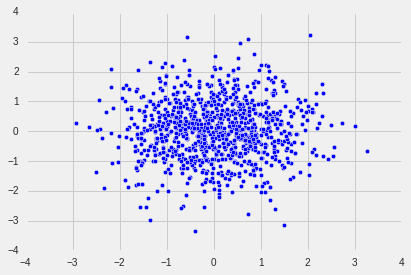

In [8]:
plt.scatter(X[:, 0], X[:, 1])

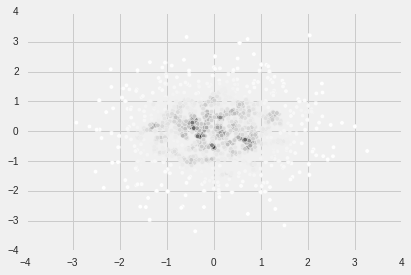

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=dens)

## Redukcja wymiarowości


# Regresja liniowa

## Zadanie regresji liniowej
* __Regresja__: modelowanie związku między zmienną _zależną_ $y$ generowaną przez __system__ a zmiennymi _niezależnymi_ ($x_1, x_2, \dots$), które aktywują ten system. Związek jest zadany przez dodanie niezależnego czynnika _szumu_ $\eta$, który jest zmienną _ukrytą_
$$y=f(x)+\eta\hspace{5ex}\eta\sim\mathcal{N}(0,\sigma)$$
  
* Celem regresji (liniowej) jest estymacja wektora parametrów $\theta$ dla zbioru danych $\{(x_i, y_i)\}_{i=1}^{N}$ jako relacji 
$$y=\theta_0+\theta_1x_1+\dots+\theta_px_p=\theta_0+\theta^T{}x+\eta=[\theta_0,\theta]^T[1,x]+\eta=\theta^Tx+\eta,$$ 
gdzie $\theta_0$ to _bias_.
  
* W modelu _regresji liniowej_ mamy model $\hat{y}=\hat{\theta}^Tx$
  
* W metodzie _minimalnych kwadratów_ _least squares_ __LS__ funkcja kosztu $$J(\theta)=\sum_{i=1}^{N}(y_i-\theta^Tx_i)^2$$ Biorąc gradient ze względu na $\theta$
$$\nabla{}J(\theta)=\sum_{i=1}^{N}(y_i-\theta^Tx_i)^2=2\sum_{i=1}^{N}(y_i-\theta^Tx_i)x_i^T$$
i przyrównując do zera otrzymujemy $$\left(\sum_ix_ix^T_i\right)\hat{\theta}=\sum_ix_iy_i$$ co można zapisać jako $$X^TX\hat{\theta}=X^Ty,$$ gdzie $y=[y_1,y_2,\dots,y_N]^T$ co daje rozwiązanie __LS__ jako 
$$\boxed{
\hat{\theta}=(X^TX)^{-1}X^Ty\;}$$ pod warunkiem istnienia $(X^TX)^{-1}$.
  
* Jeśli $(p+1)\times(p+1)$ wymiarowa macierz $X^TX$ jest odwracalna, to rozwiązanie jest __unikalne__ ze względu na _wypukłość_ i paraboliczny kształt funkcji kosztu LS.